In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset
data = pd.read_csv("train.csv")

X = data.iloc[:, 1:].values   # pixels
y = data.iloc[:, 0].values   # labels

# Normalize
X = X / 255.0

# One-hot encoding
y = to_categorical(y, 10)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


F:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9080 - loss: 0.3270
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9561 - loss: 0.1498
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9699 - loss: 0.1026
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9779 - loss: 0.0750
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9836 - loss: 0.0561


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


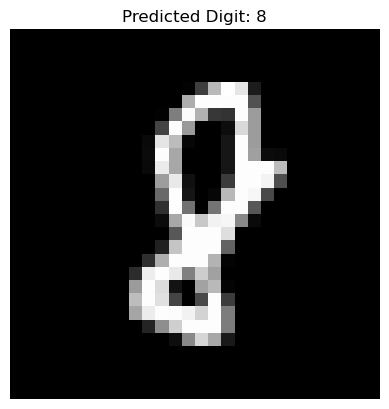

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


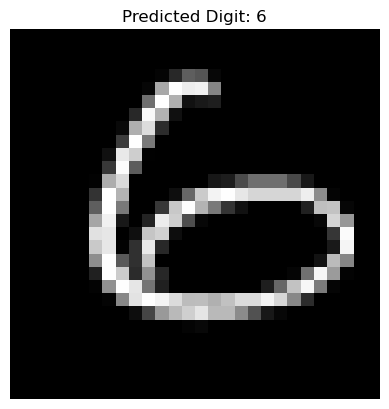

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


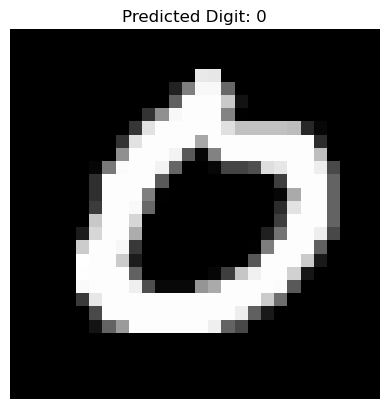

In [5]:
def predict_digit(index):
    image = X_test[index]
    prediction = model.predict(image.reshape(1, 784))
    digit = np.argmax(prediction)

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()

predict_digit(0)
predict_digit(10)
predict_digit(25)
